In [18]:
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc , silhouette_samples , silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import plot_importance
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from functools import *
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [19]:
def elbow_curve(df_input_x):
  distortions = []
  K = range(2,11)
  for k in K:
      kmeanModel = KMeans(n_clusters=k,random_state=123)
      kmeanModel.fit(df_input_x)
      distortions.append(kmeanModel.inertia_)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  return distortions,plt.show()


In [26]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df = pd.read_csv(url).drop(["UDI","Product ID"],axis=1)

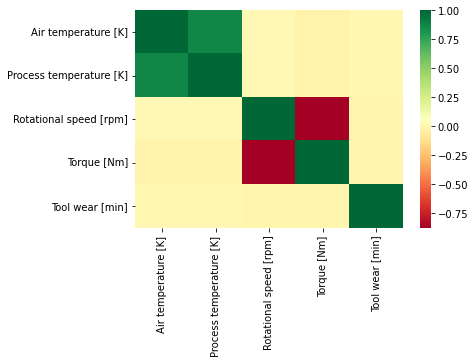

In [29]:
import seaborn as sns
sns.heatmap(df.drop(["Type","Machine failure","TWF","HDF","PWF","OSF","RNF"],axis=1).corr(),cmap="RdYlGn")

In [21]:
df_gggroup = df[["Machine failure","Type"]].groupby("Machine failure").count().rename({"Type":"Count"},axis=1).reset_index()

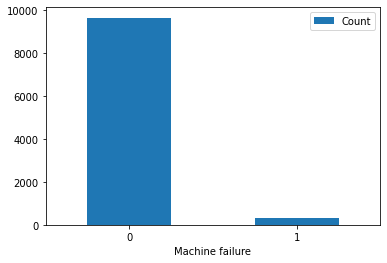

In [22]:
asx = df_gggroup.plot.bar(x='Machine failure', y='Count', rot=0)

In [23]:
df["Temp"] = df["Air temperature [K]"]*df["Process temperature [K]"]
df["Poor"] = df["Torque [Nm]"]/df["Rotational speed [rpm]"]
df["Poor2"] = df["Torque [Nm]"]/np.sqrt(df["Rotational speed [rpm]"])
df["In_Temp"] = df["Air temperature [K]"]/df["Process temperature [K]"]
df["In_Poor"] = df["Torque [Nm]"]*df["Rotational speed [rpm]"]
df["In_Poor2"] = df["Torque [Nm]"]*np.sqrt(df["Rotational speed [rpm]"])
df["Air_Sq"] = df["Air temperature [K]"]**2
df["Pro_Sq"] = df["Process temperature [K]"]**2
df["Rot_Sq"] = df["Rotational speed [rpm]"]**2
df["Tor_Sq"] = df["Torque [Nm]"]**(1/2)
df["Too_Sq"] = df["Tool wear [min]"]**(1/2)
df["Air_Sqr"] = df["Air temperature [K]"]**(1/2)
df["Pro_Sqr"] = df["Process temperature [K]"]**(1/2)
df["Rot_Sqr"] = df["Rotational speed [rpm]"]**(1/2)
df["Tor_Sqr"] = df["Torque [Nm]"]**(1/2)
df["Too_Sqr"] = df["Tool wear [min]"]**(1/2)
df["Diff_Tepm"] = np.abs(df["Air temperature [K]"]-df["Process temperature [K]"])
df["Ro_Tor_Mul"] = df["Rotational speed [rpm]"]*df["Torque [Nm]"]
df["Ro_Tor_Div"] = df["Rotational speed [rpm]"]/df["Torque [Nm]"]
df["Ro_Tor_Mul_Sqr"] = np.sqrt(df["Rotational speed [rpm]"])*np.sqrt(df["Torque [Nm]"])
df["Ro_Tor_Mul_Log"] = np.log(df["Rotational speed [rpm]"])*np.log(df["Torque [Nm]"])
df["Ro_Tor_Div_Sqr"] = np.sqrt(df["Rotational speed [rpm]"])/np.sqrt(df["Torque [Nm]"])
df["Ro_Tor_Div_Log"] = np.log(df["Rotational speed [rpm]"])/np.log(df["Torque [Nm]"])
df["Ro_Tem_Mul"] = df["Rotational speed [rpm]"]*df["Diff_Tepm"]
df["Tor_Tem_Div"] = df["Diff_Tepm"]/df["Torque [Nm]"]
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log,Ro_Tem_Mul,Tor_Tem_Div
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,91993.66,0.027595,1.086771,0.965975,66382.8,1685.581158,88863.61,95233.96,2405601,6.542171,0.000000,17.265573,17.567015,39.382737,6.542171,0.000000,10.5,66382.8,36.238318,257.648598,27.597990,6.019827,1.955698,16285.5,0.245327
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,92054.34,0.032884,1.233899,0.965986,65190.4,1737.329997,88923.24,95295.69,1982464,6.804410,1.732051,17.268468,17.569861,37.523326,6.804410,1.732051,10.5,65190.4,30.410367,255.324108,27.804494,5.514560,1.890393,14784.0,0.226782
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,91963.85,0.032977,1.276354,0.966288,74001.2,1911.977845,88863.61,95172.25,2244004,7.028513,2.236068,17.265573,17.564168,38.704005,7.028513,2.236068,10.4,74001.2,30.323887,272.031616,28.515994,5.506713,1.874866,15579.2,0.210526
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,92024.52,0.027565,1.043456,0.966299,56603.5,1495.271965,88923.24,95233.96,2053489,6.284903,2.645751,17.268468,17.567015,37.854986,6.284903,2.645751,10.4,56603.5,36.278481,237.914901,26.717609,6.023162,1.976858,14903.2,0.263291
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,92054.34,0.028409,1.066004,0.965986,56320.0,1500.933043,88923.24,95295.69,1982464,6.324555,3.000000,17.268468,17.569861,37.523326,6.324555,3.000000,10.5,56320.0,35.200000,237.318352,26.744101,5.932959,1.965346,14784.0,0.262500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,92149.92,0.018392,0.736580,0.968872,47318.0,1181.474079,89281.44,95110.56,2572816,5.431390,3.741657,17.285832,17.561321,40.049969,5.431390,3.741657,9.6,47318.0,54.372881,217.527010,24.977666,7.373797,2.180675,15398.4,0.325424
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,92180.76,0.019485,0.787167,0.969196,51897.6,1284.657028,89341.21,95110.56,2663424,5.639149,4.123106,17.288725,17.561321,40.398020,5.639149,4.123106,9.5,51897.6,51.320755,227.810448,25.591615,7.163851,2.138353,15504.0,0.298742
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,92271.40,0.020304,0.823500,0.968892,54943.0,1354.657226,89401.00,95233.96,2706025,5.779273,4.690416,17.291616,17.567015,40.558600,5.779273,4.690416,9.6,54943.0,49.251497,234.399232,25.982596,7.017941,2.110696,15792.0,0.287425
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,92301.30,0.034446,1.292529,0.968578,68288.0,1819.881315,89401.00,95295.69,1982464,6.964194,5.000000,17.291616,17.569861,37.523326,6.964194,5.000000,9.7,68288.0,29.030928,261.319728,28.141049,5.388036,1.867785,13657.6,0.200000


In [24]:
df_diff_check = df[["Machine failure","Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]].groupby("Machine failure").mean()

In [ ]:
df_diff_check

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
0,299.973999,309.995570,1540.260014,39.629655,106.693717
1,300.886431,310.290265,1496.486726,50.168142,143.781711


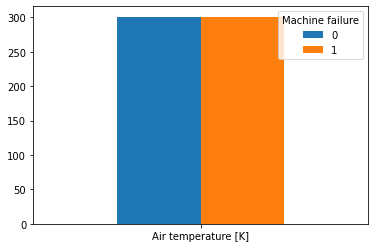

In [ ]:
ax = df_diff_check[["Air temperature [K]"]].T.plot.bar(rot=0)

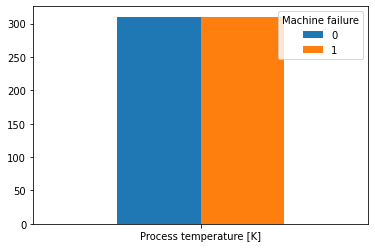

In [ ]:
ax = df_diff_check[["Process temperature [K]"]].T.plot.bar(rot=0)

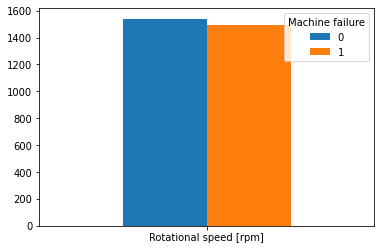

In [ ]:
ax = df_diff_check[["Rotational speed [rpm]"]].T.plot.bar(rot=0)

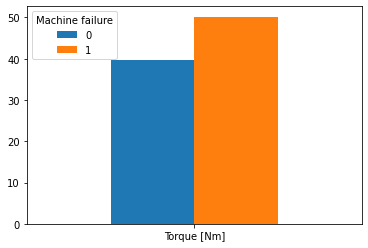

In [ ]:
ax = df_diff_check[["Torque [Nm]"]].T.plot.bar(rot=0)

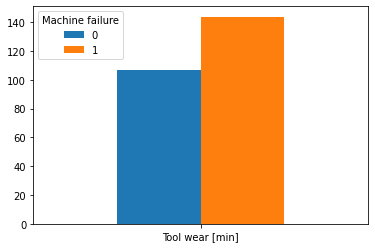

In [ ]:
ax = df_diff_check[["Tool wear [min]"]].T.plot.bar(rot=0)

In [ ]:
df_diff_check.plot.bar(x='Machine failure', y='Air temperature [K]', rot=0 , )

KeyError: ignored

In [ ]:
df_corr = df[["TWF","HDF","PWF","OSF","RNF"]].corr()

In [ ]:
df_corr

,TWF,HDF,PWF,OSF,RNF
TWF,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,0.038243,0.046396,0.115836,1.000000,-0.004341
RNF,0.030970,-0.004706,-0.004273,-0.004341,1.000000


In [ ]:
df_scl = df.drop(["Type","Machine failure","TWF","HDF","PWF","OSF","RNF"],axis=1)

In [ ]:
scaler_cls = StandardScaler()
scaler_cls.fit(df_scl.fillna(0))

StandardScaler()

In [ ]:
df_scl_ok = pd.DataFrame(scaler_cls.transform(df_scl),columns=df_scl.columns)

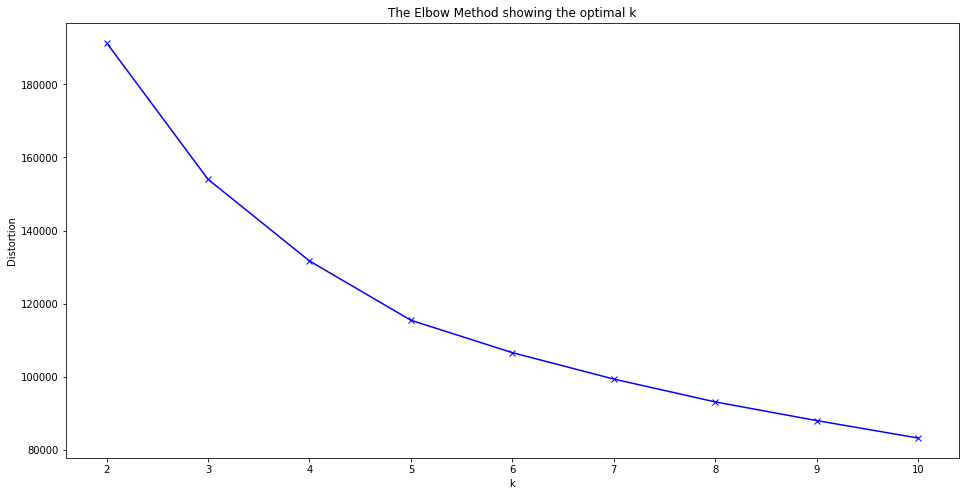

([191356.88793711062,
  154018.94155913597,
  131692.04906681957,
  115480.3863644001,
  106620.8730517003,
  99398.77854594332,
  93157.59382060636,
  88048.42764554662,
  83280.89652674668],
 None)

In [ ]:
elbow_curve(df_scl_ok)

In [ ]:
silhouettes = []
k_list = []
for i in range(2,11) :
  kmm_shil = KMeans(n_clusters=i, random_state=123).fit(df_scl_ok)
  sil_avg = silhouette_score(df_scl_ok, kmm_shil.labels_,sample_size=20000,random_state=123)
  print(f'For choose K -> {i} then shilhouette score -> {sil_avg}')
  silhouettes.append(sil_avg)
  k_list.append(i)

For choose K -> 2 then shilhouette score -> 0.2843304275210366
For choose K -> 3 then shilhouette score -> 0.24660261864487779
For choose K -> 4 then shilhouette score -> 0.2298361021626488
For choose K -> 5 then shilhouette score -> 0.21982399157162694
For choose K -> 6 then shilhouette score -> 0.2087353627520062
For choose K -> 7 then shilhouette score -> 0.18711950578256353
For choose K -> 8 then shilhouette score -> 0.19264305503049017
For choose K -> 9 then shilhouette score -> 0.1903439434942989
For choose K -> 10 then shilhouette score -> 0.1874305566945492


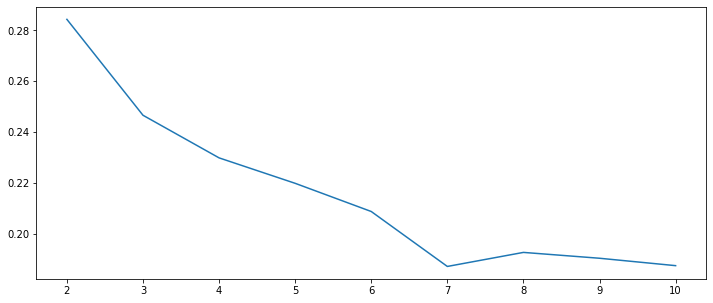

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(k_list, silhouettes)
fig.show()#(distortions,silhouettes),fig.show()

In [ ]:
kmns_label = KMeans(n_clusters=3, random_state=123).fit(df_scl_ok)

In [ ]:
kmns_label.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
import copy
df_cls = copy.deepcopy(df) 
df_cls["KMN_CLUS"] = kmns_label.labels_

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_cls_1hot  = df_cls[["Type","KMN_CLUS"]]
df_cls_ylab  = df_cls[["Machine failure",'TWF',"HDF","PWF","OSF","RNF"]]
df_cls_scl   = df_cls.drop(["Machine failure","Type","KMN_CLUS"],axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1)
scaler = StandardScaler()
scaler.fit(df_cls_scl.fillna(0))
df_cls_scl_ok = pd.DataFrame(scaler.transform(df_cls_scl),columns=df_cls_scl.columns)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = df_cls_1hot
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
df_cls_1hot_ok = pd.DataFrame(onehot_encoded,columns=["H","L","M",0,1,2])
all_cls_data = pd.concat([df_cls_1hot_ok,df_cls_scl_ok,df_cls_ylab],axis=1)

In [ ]:
all_cls_data

,H,L,M,0,1,2,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.0,0.0,1.0,0.0,1.0,0.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.980109,0.079191,0.169599,-0.538083,0.629443,0.428624,-0.952331,-0.947567,0.009075,0.333144,-2.723864,-0.952408,-0.947249,0.099020,0.333144,-2.723864,0.498849,0.629443,-0.276573,0.647619,0.493815,-0.281829,-0.317551,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.921349,0.677574,0.660881,-0.534714,0.512456,0.588397,-0.902663,-0.880464,-0.673067,0.655146,-2.240150,-0.902248,-0.879700,-0.751580,0.655146,-2.240150,0.498849,0.512456,-0.509201,0.537571,0.615954,-0.640230,-0.628831,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-1.008976,0.688185,0.802643,-0.442365,1.376889,1.127618,-0.952331,-1.014649,-0.251437,0.930320,-2.099392,-0.952408,-1.014809,-0.211471,0.930320,-2.099392,0.398954,1.376889,-0.512653,1.328550,1.036780,-0.645796,-0.702839,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.950226,0.075735,0.024965,-0.439026,-0.330009,-0.158951,-0.902663,-0.947567,-0.558567,0.017245,-1.984978,-0.902248,-0.947249,-0.599860,0.017245,-1.984978,0.398954,-0.330009,-0.274970,-0.286628,-0.026899,-0.279463,-0.216691,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.921349,0.171294,0.100256,-0.534714,-0.357824,-0.141473,-0.902663,-0.880464,-0.673067,0.065935,-1.886046,-0.902248,-0.879700,-0.751580,0.065935,-1.886046,0.498849,-0.357824,-0.318019,-0.314871,-0.011229,-0.343447,-0.271563,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,0.0,0.0,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.828794,-0.962189,-0.999734,0.347265,-1.241015,-1.127795,-0.604307,-1.081709,0.278644,-1.030777,-1.678922,-0.601463,-1.082381,0.404249,-1.030777,-1.678922,-0.400212,-1.241015,0.447285,-1.251847,-1.056011,0.678583,0.754811,0,0,0,0,0,0
9996,1.0,0.0,0.0,1.0,0.0,0.0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.798930,-0.838429,-0.830816,0.446386,-0.791708,-0.809220,-0.554523,-1.081709,0.424714,-0.775671,-1.572394,-0.551362,-1.082381,0.563467,-0.775671,-1.572394,-0.500108,-0.791708,0.325456,-0.765001,-0.692883,0.529662,0.553082,0,0,0,0,0,0
9997,0.0,0.0,1.0,1.0,0.0,0.0,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.711158,-0.745799,-0.709497,0.353432,-0.492922,-0.593096,-0.504722,-0.947567,0.493392,-0.603614,-1.413960,-0.501269,-0.947249,0.636925,-0.603614,-1.413960,-0.400212,-0.492922,0.242860,-0.453070,-0.461632,0.426164,0.421253,0,0,0,0,0,0
9998,1.0,0.0,0.0,0.0,1.0,0.0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.682204,0.854370,0.856656,0.257487,0.816363,0.843272,-0.504722,-0.880464,-0.673067,0.851343,-1.327501,-0.501269,-0.879700,-0.751580,0.851343,-1.327501,-0.300317,0.816363,-0.564263,0.821420,0.815014,-0.729977,-0.736595,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  all_cls_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF",0,1,2], axis=1),
  all_cls_data['Machine failure'],
  test_size=0.3,random_state=123)

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
# plt.rcParams.update({'figure.figsize': (16.0, 8.0)})
# plt.tight_layout
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("Machine Failure")
# plt.savefig("FT_IMPORTRANT_MachineFailure.png")
ft_mf = pd.DataFrame({
    "Fearture" : all_cls_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF",0,1,2], axis=1).columns , 
    "VarIm_MachineFailure" : rf.feature_importances_
}
)

In [ ]:
ft_mf.sort_values(by=["VarIm_MachineFailure"],ascending=False)

,Fearture,VarIm_MachineFailure
11,In_Temp,0.084478
24,Diff_Tepm,0.083128
25,Ro_Tor_Mul,0.063552
12,In_Poor,0.061391
27,Ro_Tor_Mul_Sqr,0.059067
28,Ro_Tor_Mul_Log,0.047083
5,Rotational speed [rpm],0.042792
23,Too_Sqr,0.042702
13,In_Poor2,0.040292
7,Tool wear [min],0.039281


In [ ]:
lss_all_sel = ft_mf[ft_mf["VarIm_MachineFailure"] < 0.05]["Fearture"].tolist()

In [ ]:
lss_all_sel

['H',
 'L',
 'M',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Temp',
 'Poor',
 'Poor2',
 'In_Poor2',
 'Air_Sq',
 'Pro_Sq',
 'Rot_Sq',
 'Tor_Sq',
 'Too_Sq',
 'Air_Sqr',
 'Pro_Sqr',
 'Rot_Sqr',
 'Tor_Sqr',
 'Too_Sqr',
 'Ro_Tor_Div',
 'Ro_Tor_Mul_Log',
 'Ro_Tor_Div_Sqr',
 'Ro_Tor_Div_Log']

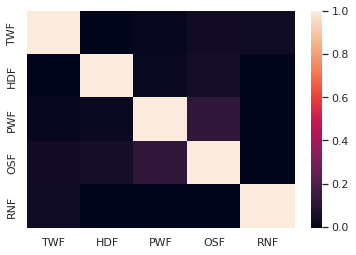

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(df_corr)

In [ ]:
df.groupby("Machine failure").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
Machine failure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,299.973999,309.995570,1540.260014,39.629655,106.693717,0.000000,0.000000,0.000000,0.000000,0.001863,92993.208748,0.026553,1.024816,0.967667,59631.036446,1535.611584,89988.362474,96099.463788,2.400419e+06,6.247346,9.696136,17.319662,17.606640,39.191956,6.247346,9.696136,10.021571,59631.036446,42.870074,243.373394,26.730425,6.424212,2.023581
1,300.886431,310.290265,1496.486726,50.168142,143.781711,0.135693,0.339233,0.280236,0.289086,0.002950,93364.520737,0.036638,1.354103,0.969687,69545.803245,1864.313061,90536.922507,96281.903009,2.387217e+06,6.940918,11.386148,17.345976,17.615015,38.434565,6.940918,11.386148,9.403835,69545.803245,51.635311,260.949615,27.693904,6.215704,1.986360


In [ ]:
df.groupby("TWF").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,HDF,PWF,OSF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
TWF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,300.003576,310.004822,1538.649488,39.996845,107.449970,0.029435,0.011553,0.009443,0.009544,0.001808,93005.156060,0.026903,1.036262,0.967734,59978.639261,1547.096938,90006.147488,96105.191121,2.399535e+06,6.271678,9.730551,17.320515,17.606903,39.164748,6.271678,9.730551,10.001246,59978.639261,43.150341,243.993183,26.764852,6.415937,2.022138
1,300.297826,310.165217,1566.173913,37.836957,216.369565,1.000000,0.000000,0.021739,0.065217,0.021739,93144.322174,0.025169,0.974687,0.968184,57480.330435,1472.667704,90182.488913,96204.616522,2.494321e+06,6.093307,14.703865,17.329014,17.611459,39.497894,6.093307,14.703865,9.867391,57480.330435,46.818892,238.785645,26.381021,6.678285,2.061551


In [ ]:
df.groupby("HDF").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,PWF,OSF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
HDF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,299.975195,309.996449,1541.120486,39.833576,107.959838,0.022661,0.004654,0.009307,0.009307,0.001922,92993.847768,0.026744,1.031099,0.967668,59839.008134,1542.150899,89989.083573,96100.013342,2.407074e+06,6.259124,9.753382,17.319697,17.606665,39.196537,6.259124,9.753382,10.021254,59839.008134,43.37248,243.712141,26.742280,6.433146,2.024717
1,302.560870,310.788696,1337.260870,53.166957,107.191304,1.000000,0.000000,0.026087,0.052174,0.000000,94032.843913,0.039853,1.455490,0.973527,70981.521739,1942.469616,91543.438870,96590.025130,1.789463e+06,7.279430,9.757368,17.394268,17.629191,36.565467,7.279430,9.757368,8.227826,70981.521739,25.52346,266.067574,28.551598,5.041618,1.816173


In [ ]:
df.groupby("PWF").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,OSF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
PWF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,300.004250,310.006047,1536.616254,39.905119,108.009187,0.024634,0.004543,0.011307,0.008682,0.001918,93005.727500,0.026816,1.033437,0.967732,59878.116042,1544.100326,90006.545451,96105.947482,2.389489e+06,6.268115,9.757334,17.320535,17.606938,39.144748,6.268115,9.757334,10.001797,59878.116042,42.545058,243.862101,26.767521,6.397883,2.019580
1,300.075789,309.954737,1763.968421,48.514737,101.884211,1.000000,0.010526,0.031579,0.126316,0.000000,93012.961579,0.035105,1.301067,0.968122,69249.800000,1823.493748,90050.041053,96074.473368,3.492956e+06,6.556875,9.346143,17.322586,17.605473,41.411240,6.556875,9.346143,9.878947,69249.800000,108.035418,255.138654,26.300765,8.425370,2.307885


In [ ]:
df.groupby("OSF").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,RNF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
OSF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,300.004534,310.004888,1540.641184,39.804969,106.963846,0.024339,0.004343,0.011008,0.008382,0.001919,93005.471203,0.026731,1.030476,0.967736,59782.809241,1540.870441,90006.720585,96105.231143,2.405641e+06,6.257402,9.707427,17.320543,17.606905,39.190319,6.257402,9.707427,10.000353,59782.809241,43.362529,243.611446,26.738270,6.432851,2.024761
1,300.044898,310.073469,1350.326531,58.370408,207.693878,1.000000,0.030612,0.061224,0.122449,0.000000,93038.636633,0.043441,1.591970,0.967652,78592.788776,2141.291108,90031.013878,96147.816327,1.827095e+06,7.630403,14.401337,17.321706,17.608851,36.737401,7.630403,14.401337,10.028571,78592.788776,23.432678,280.119867,29.270636,4.830107,1.775613


In [ ]:
df.groupby("RNF").mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
RNF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,300.003386,310.004118,1538.878469,39.979892,107.919547,0.033864,0.004509,0.011522,0.009518,0.009819,93004.884899,0.026889,1.035773,0.967735,59959.767488,1546.522187,90006.033610,96104.753569,2.400321e+06,6.270304,9.752111,17.320510,17.606883,39.167527,6.270304,9.752111,10.000731,59959.767488,43.179615,243.954525,26.761977,6.417975,2.022443
1,300.815789,310.763158,1485.000000,43.673684,124.473684,0.052632,0.052632,0.000000,0.000000,0.000000,93484.529474,0.030016,1.144296,0.967989,63843.742105,1668.825514,90492.901579,96575.758421,2.216572e+06,6.561735,10.444981,17.343976,17.628430,38.511102,6.561735,10.444981,9.947368,63843.742105,36.653699,251.692896,27.345985,5.980473,1.957432


In [ ]:
df.drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp,Poor,Poor2,In_Temp,In_Poor,In_Poor2,Air_Sq,Pro_Sq,Rot_Sq,Tor_Sq,Too_Sq,Air_Sqr,Pro_Sqr,Rot_Sqr,Tor_Sqr,Too_Sqr,Diff_Tepm,Ro_Tor_Mul,Ro_Tor_Div,Ro_Tor_Mul_Sqr,Ro_Tor_Mul_Log,Ro_Tor_Div_Sqr,Ro_Tor_Div_Log
0,M,298.1,308.6,1551,42.8,0,0,91993.66,0.027595,1.086771,0.965975,66382.8,1685.581158,88863.61,95233.96,2405601,6.542171,0.000000,17.265573,17.567015,39.382737,6.542171,0.000000,10.5,66382.8,36.238318,257.648598,27.597990,6.019827,1.955698
1,L,298.2,308.7,1408,46.3,3,0,92054.34,0.032884,1.233899,0.965986,65190.4,1737.329997,88923.24,95295.69,1982464,6.804410,1.732051,17.268468,17.569861,37.523326,6.804410,1.732051,10.5,65190.4,30.410367,255.324108,27.804494,5.514560,1.890393
2,L,298.1,308.5,1498,49.4,5,0,91963.85,0.032977,1.276354,0.966288,74001.2,1911.977845,88863.61,95172.25,2244004,7.028513,2.236068,17.265573,17.564168,38.704005,7.028513,2.236068,10.4,74001.2,30.323887,272.031616,28.515994,5.506713,1.874866
3,L,298.2,308.6,1433,39.5,7,0,92024.52,0.027565,1.043456,0.966299,56603.5,1495.271965,88923.24,95233.96,2053489,6.284903,2.645751,17.268468,17.567015,37.854986,6.284903,2.645751,10.4,56603.5,36.278481,237.914901,26.717609,6.023162,1.976858
4,L,298.2,308.7,1408,40.0,9,0,92054.34,0.028409,1.066004,0.965986,56320.0,1500.933043,88923.24,95295.69,1982464,6.324555,3.000000,17.268468,17.569861,37.523326,6.324555,3.000000,10.5,56320.0,35.200000,237.318352,26.744101,5.932959,1.965346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,92149.92,0.018392,0.736580,0.968872,47318.0,1181.474079,89281.44,95110.56,2572816,5.431390,3.741657,17.285832,17.561321,40.049969,5.431390,3.741657,9.6,47318.0,54.372881,217.527010,24.977666,7.373797,2.180675
9996,H,298.9,308.4,1632,31.8,17,0,92180.76,0.019485,0.787167,0.969196,51897.6,1284.657028,89341.21,95110.56,2663424,5.639149,4.123106,17.288725,17.561321,40.398020,5.639149,4.123106,9.5,51897.6,51.320755,227.810448,25.591615,7.163851,2.138353
9997,M,299.0,308.6,1645,33.4,22,0,92271.40,0.020304,0.823500,0.968892,54943.0,1354.657226,89401.00,95233.96,2706025,5.779273,4.690416,17.291616,17.567015,40.558600,5.779273,4.690416,9.6,54943.0,49.251497,234.399232,25.982596,7.017941,2.110696
9998,H,299.0,308.7,1408,48.5,25,0,92301.30,0.034446,1.292529,0.968578,68288.0,1819.881315,89401.00,95295.69,1982464,6.964194,5.000000,17.291616,17.569861,37.523326,6.964194,5.000000,9.7,68288.0,29.030928,261.319728,28.141049,5.388036,1.867785


## Handle Imbalance

In [ ]:
class Imbalace_Method :
  def __init__(self,x_data,y_data,dx_test,dy_test,fea_ls):
    self.x_data = x_data
    self.y_data = y_data
    self.dx_test = dx_test
    self.dy_test = dy_test
    self.fea_ls = list(fea_ls)
  
  def oversam(self) :
    ros = RandomOverSampler(random_state=0)
    ros.fit(self.x_data, self.y_data)
    X_sampled, y_sampled = ros.fit_resample(self.x_data, self.y_data)
    df_sampled = pd.concat([pd.DataFrame(data=X_sampled),pd.DataFrame(data=y_sampled)], axis=1, sort=False)
    self.fea_ls.remove("Machine failure")
    self.fea_ls.append("Machine failure")
    df_sampled.columns= self.fea_ls
    return df_sampled,X_sampled,y_sampled,self.dx_test,self.dy_test , "OverSampling"
  
  def downsam(self) :
    ros = RandomUnderSampler(random_state=0)
    ros.fit(self.x_data, self.y_data)
    X_sampled, y_sampled = ros.fit_resample(self.x_data, self.y_data)
    df_sampled = pd.concat([pd.DataFrame(data=X_sampled),pd.DataFrame(data=y_sampled)], axis=1, sort=False)
    self.fea_ls.remove("Machine failure")
    self.fea_ls.append("Machine failure")
    df_sampled.columns= self.fea_ls
    return df_sampled,X_sampled,y_sampled,self.dx_test,self.dy_test , "UnderSampling"

  def smotesam(self) :
    sm = SMOTE(random_state=0)
    sm.fit(self.x_data, self.y_data) 
    X_sampled, y_sampled = sm.fit_resample(self.x_data, self.y_data)
    df_sampled = pd.concat([pd.DataFrame(data=X_sampled),pd.DataFrame(data=y_sampled)], axis=1, sort=False)
    self.fea_ls.remove("Machine failure")
    self.fea_ls.append("Machine failure")
    df_sampled.columns= self.fea_ls
    return df_sampled,X_sampled,y_sampled,self.dx_test,self.dy_test , "Smote"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_split_1hot  = df[["Type"]]
df_split_ylab  = df[["Machine failure",'TWF',"HDF","PWF","OSF","RNF"]]
df_split_scl   = df.drop(["Machine failure","Type"],axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1)
scaler = StandardScaler()
scaler.fit(df_split_scl.fillna(0))
df_split_scl_ok = pd.DataFrame(scaler.transform(df_split_scl),columns=df_split_scl.columns)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = df_split_1hot
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
df_split_1hot_ok = pd.DataFrame(onehot_encoded,columns=["H","L","M"])
all_merge_data = pd.concat([df_split_scl_ok,df_split_1hot_ok,df_split_ylab],axis=1)

In [ ]:
len(list(set(list(df_split_scl_ok.columns))))

30

In [ ]:
def cln_col(ttxt) :
  return "".join([uu for uu in ttxt if uu.isalpha() or uu == " " or uu.isdigit() ])
all_merge_data.columns = [cln_col(ii) for ii in all_merge_data.columns]
col_order = sorted(list(all_merge_data.columns))
all_merge_data = all_merge_data[col_order]
ls_feature = all_merge_data.drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['Machine failure'],
  test_size=0.3,random_state=42)

In [ ]:
imbal_master = Imbalace_Method(X_train,y_train,X_test,y_test,ls_feature)

In [ ]:
hdsam_ovs = imbal_master.oversam()
hdsam_dws = imbal_master.downsam()
hdsam_smt = imbal_master.smotesam()

In [ ]:
hdsam_ovs[0]

,Air temperature K,AirSq,AirSqr,DiffTepm,H,InPoor,InPoor2,InTemp,L,M,Poor,Poor2,ProSq,ProSqr,Process temperature K,RoTemMul,RoTorDiv,RoTorDivLog,RoTorDivSqr,RoTorMul,RoTorMulLog,RoTorMulSqr,RotSq,RotSqr,Rotational speed rpm,Temp,TooSq,TooSqr,Tool wear min,TorSq,TorSqr,TorTemDiv,Torque Nm,Machine failure
0,-1.402354,-1.398590,-1.404229,0.998328,0.0,-1.257321,-1.221662,-1.047511,0.0,1.0,-1.148365,-1.168700,-1.215763,-1.217556,-1.216963,1.311058,0.660532,0.970760,0.929523,-1.257321,-1.179262,-1.269949,0.670174,0.822103,0.776593,-1.364179,0.496863,0.496863,0.393537,-1.190952,-1.190952,1.217243,-1.192455,0
1,-0.352437,-0.355219,-0.351040,-0.100525,0.0,0.176310,0.445538,0.075290,0.0,1.0,0.883973,0.773616,-0.544620,-0.542117,-0.542955,-0.929919,-0.572998,-0.695931,-0.744409,0.176310,0.493490,0.215637,-1.000177,-1.208744,-1.142245,-0.447610,-1.168940,-1.168940,-1.208953,0.655146,0.655146,-0.564952,0.633308,0
2,0.247515,0.244291,0.249124,1.497807,0.0,1.650539,1.895707,-1.404516,0.0,1.0,2.403765,2.253352,1.346147,1.343325,1.344270,-0.367520,-0.893885,-1.352603,-1.318929,1.650539,1.520190,1.569013,-1.297429,-1.659454,-1.538284,0.726465,0.650598,0.650598,0.597776,1.874475,1.874475,-0.812544,2.087899,0
3,-0.852397,-0.852978,-0.852096,-0.000629,0.0,0.321808,0.363227,-0.052436,1.0,0.0,0.388917,0.389518,-1.148747,-1.149963,-1.149563,-0.403579,-0.407110,-0.464661,-0.479056,0.321808,0.434371,0.356052,-0.507549,-0.533522,-0.528663,-1.007001,0.981104,0.981104,1.069096,0.426446,0.426446,-0.419600,0.382516,0
4,1.947381,1.955931,1.943110,-0.999587,0.0,0.479550,0.350328,1.070291,1.0,0.0,0.108100,0.173561,1.957514,1.947561,1.950878,-0.704857,-0.289843,-0.320721,-0.301460,0.479550,0.427212,0.506436,-0.114936,-0.046766,-0.071265,2.018554,1.165951,1.165951,1.351888,0.304941,0.304941,-0.585601,0.252105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13503,0.997456,0.997053,0.997646,-2.098440,0.0,1.508317,1.656194,2.070232,1.0,0.0,1.939551,1.858777,-0.073526,-0.069959,-0.071148,-2.156111,-0.816635,-1.200903,-1.171684,1.508317,1.375757,1.444595,-1.110916,-1.372368,-1.287273,0.565524,1.195912,1.195912,1.399020,1.619111,1.619111,-1.334170,1.766886,1
13504,0.297511,0.294359,0.299083,0.099266,0.0,0.959114,0.902816,-0.074233,1.0,0.0,0.773058,0.811398,0.466171,0.468998,0.468059,-0.367819,-0.539573,-0.710705,-0.689476,0.959114,0.863416,0.952525,-0.535426,-0.569675,-0.562131,0.378263,-0.257396,-0.257396,-0.470551,0.851343,0.851343,-0.620889,0.854005,1
13505,-0.402433,-0.405070,-0.401108,-0.200421,0.0,1.384963,1.100933,0.167884,1.0,0.0,0.608972,0.735770,-0.679023,-0.677117,-0.677756,-0.229897,-0.486400,-0.665639,-0.603663,1.384963,1.018747,1.335710,-0.168863,-0.111290,-0.132624,-0.535498,1.493058,1.493058,1.886052,0.886534,0.886534,-0.699531,0.894131,1
13506,-0.402433,-0.405070,-0.401108,-0.600004,0.0,2.594264,2.719512,0.551546,1.0,0.0,3.047426,2.938516,-0.947567,-0.947249,-0.947360,-1.483315,-0.981513,-1.574445,-1.494528,2.594264,2.013209,2.366452,-1.281115,-1.633730,-1.515972,-0.651391,-0.289223,-0.289223,-0.501972,2.440403,2.440403,-1.327377,2.830243,1


In [ ]:
def lasso_selection(df_imm) :
  try :
    X_train, X_test, y_train, y_test = train_test_split(
      df_imm.drop(labels=["Machine failure","TWF","HDF","PWF","OSF","RNF"], axis=1),
      df_imm['Machine failure'],
      test_size=0.3,random_state=123)
  except :
    X_train, X_test, y_train, y_test = train_test_split(
      df_imm.drop(labels=["Machine failure"], axis=1),
      df_imm['Machine failure'],
      test_size=0.3,random_state=123)  
  sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver="liblinear"))
  sel_.fit(X_train, y_train)
  selected_feat = X_train.columns[(sel_.get_support())]
  removed_feats = list(X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()])
  return removed_feats

def rfr_selection(df_imm) :
  try :
    X_train, X_test, y_train, y_test = train_test_split(
      df_imm.drop(labels=["Machine failure","TWF","HDF","PWF","OSF","RNF"], axis=1),
      df_imm['Machine failure'],
      test_size=0.1,random_state=123)
  except :
    X_train, X_test, y_train, y_test = train_test_split(
      df_imm.drop(labels=["Machine failure"], axis=1),
      df_imm['Machine failure'],
      test_size=0.1,random_state=123)  
  sel_ = SelectFromModel(RandomForestClassifier(n_estimators = 100))
  sel_.fit(X_train, y_train)
  selected_feat= X_train.columns[(sel_.get_support())]
  removed_feats = [ i for i in X_train.columns if i not in list(selected_feat)]
  return removed_feats

In [ ]:
hdsam_ovs[0]

,Air temperature K,AirSq,AirSqr,DiffTepm,H,InPoor,InPoor2,InTemp,L,M,Poor,Poor2,ProSq,ProSqr,Process temperature K,RoTemMul,RoTorDiv,RoTorDivLog,RoTorDivSqr,RoTorMul,RoTorMulLog,RoTorMulSqr,RotSq,RotSqr,Rotational speed rpm,Temp,TooSq,TooSqr,Tool wear min,TorSq,TorSqr,TorTemDiv,Torque Nm,Machine failure
0,-1.402354,-1.398590,-1.404229,0.998328,0.0,-1.257321,-1.221662,-1.047511,0.0,1.0,-1.148365,-1.168700,-1.215763,-1.217556,-1.216963,1.311058,0.660532,0.970760,0.929523,-1.257321,-1.179262,-1.269949,0.670174,0.822103,0.776593,-1.364179,0.496863,0.496863,0.393537,-1.190952,-1.190952,1.217243,-1.192455,0
1,-0.352437,-0.355219,-0.351040,-0.100525,0.0,0.176310,0.445538,0.075290,0.0,1.0,0.883973,0.773616,-0.544620,-0.542117,-0.542955,-0.929919,-0.572998,-0.695931,-0.744409,0.176310,0.493490,0.215637,-1.000177,-1.208744,-1.142245,-0.447610,-1.168940,-1.168940,-1.208953,0.655146,0.655146,-0.564952,0.633308,0
2,0.247515,0.244291,0.249124,1.497807,0.0,1.650539,1.895707,-1.404516,0.0,1.0,2.403765,2.253352,1.346147,1.343325,1.344270,-0.367520,-0.893885,-1.352603,-1.318929,1.650539,1.520190,1.569013,-1.297429,-1.659454,-1.538284,0.726465,0.650598,0.650598,0.597776,1.874475,1.874475,-0.812544,2.087899,0
3,-0.852397,-0.852978,-0.852096,-0.000629,0.0,0.321808,0.363227,-0.052436,1.0,0.0,0.388917,0.389518,-1.148747,-1.149963,-1.149563,-0.403579,-0.407110,-0.464661,-0.479056,0.321808,0.434371,0.356052,-0.507549,-0.533522,-0.528663,-1.007001,0.981104,0.981104,1.069096,0.426446,0.426446,-0.419600,0.382516,0
4,1.947381,1.955931,1.943110,-0.999587,0.0,0.479550,0.350328,1.070291,1.0,0.0,0.108100,0.173561,1.957514,1.947561,1.950878,-0.704857,-0.289843,-0.320721,-0.301460,0.479550,0.427212,0.506436,-0.114936,-0.046766,-0.071265,2.018554,1.165951,1.165951,1.351888,0.304941,0.304941,-0.585601,0.252105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13503,0.997456,0.997053,0.997646,-2.098440,0.0,1.508317,1.656194,2.070232,1.0,0.0,1.939551,1.858777,-0.073526,-0.069959,-0.071148,-2.156111,-0.816635,-1.200903,-1.171684,1.508317,1.375757,1.444595,-1.110916,-1.372368,-1.287273,0.565524,1.195912,1.195912,1.399020,1.619111,1.619111,-1.334170,1.766886,1
13504,0.297511,0.294359,0.299083,0.099266,0.0,0.959114,0.902816,-0.074233,1.0,0.0,0.773058,0.811398,0.466171,0.468998,0.468059,-0.367819,-0.539573,-0.710705,-0.689476,0.959114,0.863416,0.952525,-0.535426,-0.569675,-0.562131,0.378263,-0.257396,-0.257396,-0.470551,0.851343,0.851343,-0.620889,0.854005,1
13505,-0.402433,-0.405070,-0.401108,-0.200421,0.0,1.384963,1.100933,0.167884,1.0,0.0,0.608972,0.735770,-0.679023,-0.677117,-0.677756,-0.229897,-0.486400,-0.665639,-0.603663,1.384963,1.018747,1.335710,-0.168863,-0.111290,-0.132624,-0.535498,1.493058,1.493058,1.886052,0.886534,0.886534,-0.699531,0.894131,1
13506,-0.402433,-0.405070,-0.401108,-0.600004,0.0,2.594264,2.719512,0.551546,1.0,0.0,3.047426,2.938516,-0.947567,-0.947249,-0.947360,-1.483315,-0.981513,-1.574445,-1.494528,2.594264,2.013209,2.366452,-1.281115,-1.633730,-1.515972,-0.651391,-0.289223,-0.289223,-0.501972,2.440403,2.440403,-1.327377,2.830243,1


In [ ]:
list_lass_ovs = lasso_selection(hdsam_ovs[0])
list_lass_dws = lasso_selection(hdsam_dws[0])
list_lass_smt = lasso_selection(hdsam_smt[0])
print(list_lass_ovs)
print(list_lass_dws)
print(list_lass_smt)

['Air temperature K', 'AirSq', 'AirSqr', 'InPoor2', 'Poor2', 'ProSqr', 'Process temperature K', 'RoTorDivSqr', 'Temp', 'Torque Nm']
['Air temperature K', 'AirSq', 'AirSqr', 'InPoor', 'InPoor2', 'InTemp', 'M', 'Poor2', 'ProSqr', 'Process temperature K', 'RoTemMul', 'RoTorDivLog', 'RoTorDivSqr', 'RoTorMul', 'RoTorMulLog', 'RoTorMulSqr', 'RotSq', 'RotSqr', 'Rotational speed rpm', 'Temp', 'TorSq', 'TorSqr', 'Torque Nm']
['Air temperature K', 'AirSq', 'AirSqr', 'L', 'Poor', 'Poor2', 'ProSqr', 'Process temperature K', 'RoTorDivSqr', 'Temp', 'TorSq', 'TorSqr', 'Torque Nm']


In [ ]:
list_rfr_ovs = rfr_selection(hdsam_ovs[0])
list_rfr_dws = rfr_selection(hdsam_dws[0])
list_rfr_smt = rfr_selection(hdsam_smt[0])
print(list_rfr_ovs)
print(list_rfr_dws)
print(list_rfr_smt)

['Air temperature K', 'AirSq', 'AirSqr', 'DiffTepm', 'H', 'InPoor2', 'InTemp', 'L', 'M', 'Poor2', 'ProSq', 'ProSqr', 'Process temperature K', 'RoTemMul', 'RoTorDivLog', 'RoTorMulLog', 'Temp', 'TorSq', 'Torque Nm']
['Air temperature K', 'AirSq', 'AirSqr', 'DiffTepm', 'H', 'InPoor', 'InTemp', 'L', 'M', 'Poor2', 'ProSq', 'ProSqr', 'Process temperature K', 'RoTorDiv', 'RoTorMul', 'RoTorMulLog', 'Temp', 'TorSqr', 'Torque Nm']
['Air temperature K', 'AirSq', 'AirSqr', 'DiffTepm', 'H', 'InPoor', 'InPoor2', 'InTemp', 'L', 'M', 'Poor', 'ProSq', 'ProSqr', 'Process temperature K', 'RoTemMul', 'RoTorMul', 'RoTorMulLog', 'RoTorMulSqr', 'Temp', 'TorSq', 'TorSqr', 'Torque Nm']


In [ ]:
list_lass = lasso_selection(all_merge_data)
list_rfr = rfr_selection(all_merge_data)
list_not_im = set(list_lass).intersection(set(list_rfr))
print(list_not_im)

{'Poor2', 'Poor', 'Temp', 'ProSq', 'Air temperature K', 'ProSqr', 'Process temperature K', 'RoTorDivSqr', 'TorSq', 'Torque Nm', 'RoTorDivLog', 'TorSqr', 'AirSqr'}


In [ ]:
list_drop_fea = list(set(list_rfr_ovs).intersection(set(list_rfr_dws)).intersection(set(list_rfr_smt)).intersection(set(list_lass_ovs)).intersection(set(list_lass_dws)).intersection(set(list_lass_smt)))
print(list_drop_fea)

['Temp', 'Air temperature K', 'ProSqr', 'Process temperature K', 'Torque Nm', 'AirSq', 'AirSqr']


In [ ]:
list_drop_fea_eg = list(set(list_rfr_ovs).intersection(set(list_rfr_dws)).intersection(set(list_rfr_smt)).intersection(set(list_lass_ovs)).intersection(set(list_lass_dws)).intersection(set(list_lass_smt)).intersection(set(lss_all_sel)))
print(list_drop_fea_eg)

['Temp']


## **MACHINE LEARNING**



*   ### **RANDOM FOREST**



In [ ]:
def rf_classify_model(tup_im,ls_remove) :
  rf = RandomForestClassifier(n_estimators=150,random_state=123,min_impurity_decrease=0.000025)
  rf.fit(tup_im[1].drop(ls_remove,axis=1), tup_im[2])
  predicted_y_train = rf.predict(tup_im[1].drop(ls_remove,axis=1))
  report_train_dic = classification_report(tup_im[2], predicted_y_train,output_dict=True)
  predicted_y_test = rf.predict(tup_im[3].drop(ls_remove,axis=1))
  report_test_dic = classification_report(tup_im[4], predicted_y_test,output_dict=True)
  res_df = pd.DataFrame(report_test_dic)
  tn, fp, fn, tp = confusion_matrix(tup_im[4], predicted_y_test).ravel()
  df_cfm = pd.DataFrame({"True":[tp,tn],"False":[fp,fn]})
  df_cfm.index = ["Model -> Positive" , "Model -> Negative"]
  return rf,res_df,df_cfm

In [ ]:
list_before_test = [ cln_col(ikk) for ikk in lss_all_sel]

In [ ]:
modl , df_rp , df_con = rf_classify_model(hdsam_ovs,list_not_im)

In [ ]:
test_pred = modl.predict_proba(hdsam_ovs[3].drop(list_not_im,axis=1))
train_pred = modl.predict_proba(hdsam_ovs[1].drop(list_not_im,axis=1))
auc_test = roc_auc_score(hdsam_ovs[4], test_pred[:, 1])
print(auc_test)

0.977636479983429


AUC score Train -> 1.0 ||| AUC score Test -> 0.977636479983429


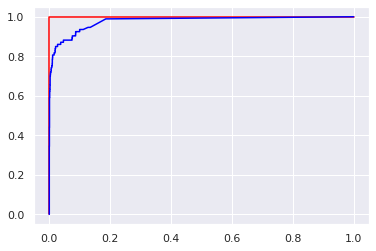

In [ ]:
fpr_train, tpr_train, _ = roc_curve(hdsam_ovs[2], train_pred[:, 1])
fpr_test, tpr_test, _ = roc_curve(hdsam_ovs[4], test_pred[:, 1])
auc_train = roc_auc_score(hdsam_ovs[2], train_pred[:, 1])
auc = roc_auc_score(hdsam_ovs[4], test_pred[:, 1])
plt.plot(fpr_train,tpr_train, color='red', label='undersampled - train , auc='+str(auc_train))
plt.plot(fpr_test,tpr_test, color='Blue', label='undersampled - test , auc='+str(auc))
print(f'AUC score Train -> {auc_train} ||| AUC score Test -> {auc}')

In [ ]:
  df_rp

,0,1,accuracy,macro avg,weighted avg
precision,0.991424,0.800000,0.986,0.895712,0.985490
recall,0.994152,0.731183,0.986,0.862667,0.986000
f1-score,0.992786,0.764045,0.986,0.878415,0.985695
support,2907.000000,93.000000,0.986,3000.000000,3000.000000




*   ### **LOGISTIC REGRESSION**



In [ ]:
def lg_classify_model(tup_im,ls_remove) :
  logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
  logreg_build = logreg.fit(tup_im[1].drop(ls_remove,axis=1), tup_im[2])
  predicted_y_train = logreg_build.predict(tup_im[1].drop(ls_remove,axis=1))
  report_train_dic = classification_report(tup_im[2], predicted_y_train,output_dict=True)
  predicted_y_test = logreg_build.predict(tup_im[3].drop(ls_remove,axis=1))
  report_test_dic = classification_report(tup_im[4], predicted_y_test,output_dict=True)
  res_df = pd.DataFrame(report_test_dic)
  tn, fp, fn, tp = confusion_matrix(tup_im[4], predicted_y_test).ravel()
  df_cfm = pd.DataFrame({"True":[tp,tn],"False":[fp,fn]})
  df_cfm.index = ["Model -> Positive" , "Model -> Negative"]
  return logreg_build,res_df,df_cfm

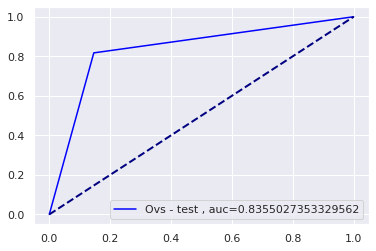

In [ ]:
modl , df_rp , df_con = lg_classify_model(hdsam_ovs,list_rfr_ovs)

In [ ]:
df_rp

,0,1,accuracy,macro avg,weighted avg
precision,0.993159,0.170874,0.852,0.582016,0.964379
recall,0.852504,0.838095,0.852,0.845300,0.852000
f1-score,0.917472,0.283871,0.852,0.600672,0.895296
support,2895.000000,105.000000,0.852,3000.000000,3000.000000


In [ ]:
fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
auc_test = roc_auc_score(y_test, y_score_test[:,1])
plt.plot(fpr_test,tpr_test, color='Blue', label='SMOTE - test , auc='+str(auc_test))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

,Air temperature K,AirSq,AirSqr,H,InPoor,InTemp,L,M,Poor,ProSq,ProSqr,Process temperature K,RotSq,RotSqr,Rotational speed rpm,Temp,TooSq,TooSqr,Tool wear min,TorSq,TorSqr,Torque Nm
2656,-0.052461,-0.055764,-0.050808,0.0,0.906203,0.381085,1.0,0.0,1.259689,-0.342853,-0.339698,-0.340752,-0.935298,-1.115070,-1.058575,-0.180837,0.981104,0.981104,1.069096,1.094721,1.094721,1.134891
445,-1.252366,-1.249987,-1.253546,0.0,-1.186554,-1.132426,1.0,0.0,-1.358244,-0.947567,-0.947249,-0.947360,1.313671,1.453591,1.418066,-1.159410,-0.387303,-0.387303,-0.596236,-1.355169,-1.355169,-1.332898
9505,-0.402433,-0.405070,-0.401108,0.0,-0.261391,-1.072188,1.0,0.0,0.131974,0.196149,0.199606,0.198455,-0.577023,-0.624045,-0.612333,-0.158846,-1.384520,-1.384520,-1.334638,0.075636,0.075636,0.011345
332,-1.202370,-1.200419,-1.203336,0.0,0.182530,-0.746511,0.0,1.0,-0.085697,-1.148747,-1.149963,-1.149563,-0.055662,0.023359,-0.004329,-1.215982,-2.723864,-2.723864,-1.695984,0.085325,0.085325,0.021376
4168,1.097448,1.097704,1.097308,0.0,-0.999859,1.595697,1.0,0.0,-0.928561,0.398633,0.401666,0.400658,0.424714,0.563467,0.520005,0.830389,0.360801,0.360801,0.220719,-0.918682,-0.918682,-0.951695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,-0.202449,-0.205566,-0.200887,0.0,-2.481937,0.467711,1.0,0.0,-2.279198,-0.611832,-0.609611,-0.610355,4.408770,3.859212,4.056468,-0.386797,-0.241636,-0.241636,-0.454840,-2.897014,-2.897014,-2.476508
8232,-0.452429,-0.454904,-0.451184,0.0,0.582291,-1.455303,1.0,0.0,1.197793,0.398633,0.401666,0.400658,-1.034483,-1.258918,-1.186869,-0.102003,-0.257396,-0.257396,-0.470551,0.956486,0.956486,0.974385
5835,0.647484,0.645298,0.648567,0.0,-0.957593,0.138192,1.0,0.0,-1.001334,0.804189,0.805493,0.805063,0.616233,0.766182,0.720813,0.734754,-1.539011,-1.539011,-1.413191,-0.963296,-0.963296,-0.991822
6689,0.847468,0.846201,0.848090,0.0,0.638783,0.721695,1.0,0.0,0.103927,0.668917,0.670928,0.670261,-0.015888,0.069957,0.040295,0.796865,-1.384520,-1.384520,-1.334638,0.351891,0.351891,0.302263




*   ### **XGB**



In [ ]:
def xgb_classify_model(tup_im,ls_remove) :
  best_hyparam = None
  param_xgb = {
      "colsample_bytree": uniform(0.7, 0.3),
      "gamma": uniform(0, 0.5),
      "learning_rate": uniform(0.03, 0.3), # default 0.1 
      "max_depth": randint(2, 6), # default 3
      "n_estimators": randint(500, 510), # default 100
      "subsample": uniform(0.6, 0.4)
  }  
  xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
  # clf = RandomizedSearchCV(xgb_model, param_distributions=param_xgb, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=-1, return_train_score=True)
  # # Fit on data
  # best_clf = clf.fit(tup_im[1].drop(ls_remove,axis=1).values, tup_im[2])
  # best_hyparam = best_clf.best_params_
  # xgb_model = xgb.XGBClassifier(**best_hyparam)
  xgb_build = xgb_model.fit(tup_im[1].drop(ls_remove,axis=1).values, tup_im[2], early_stopping_rounds=5, eval_set=[(tup_im[3].drop(ls_remove,axis=1).to_numpy(), tup_im[4])])
  predicted_y_train = xgb_build.predict(tup_im[1].drop(ls_remove,axis=1).values)
  report_train_dic = classification_report(tup_im[2], predicted_y_train,output_dict=True)
  predicted_y_test = xgb_build.predict(tup_im[3].drop(ls_remove,axis=1).values)
  report_test_dic = classification_report(tup_im[4], predicted_y_test,output_dict=True)
  res_df = pd.DataFrame(report_test_dic)
  tn, fp, fn, tp = confusion_matrix(tup_im[4], predicted_y_test).ravel()
  df_cfm = pd.DataFrame({"True":[tp,tn],"False":[fp,fn]})
  df_cfm.index = ["Model -> Positive" , "Model -> Negative"]
  return xgb_build , res_df , df_cfm

In [ ]:
modl , df_rp , df_con = xgb_classify_model(hdsam_ovs,list_not_im)

[0]	validation_0-auc:0.930505
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.929599
[2]	validation_0-auc:0.939749
[3]	validation_0-auc:0.939945
[4]	validation_0-auc:0.941154
[5]	validation_0-auc:0.939871
[6]	validation_0-auc:0.944944
[7]	validation_0-auc:0.946534
[8]	validation_0-auc:0.950903
[9]	validation_0-auc:0.955382
[10]	validation_0-auc:0.955913
[11]	validation_0-auc:0.953727
[12]	validation_0-auc:0.956777
[13]	validation_0-auc:0.963104
[14]	validation_0-auc:0.964746
[15]	validation_0-auc:0.966111
[16]	validation_0-auc:0.967653
[17]	validation_0-auc:0.969336
[18]	validation_0-auc:0.970483
[19]	validation_0-auc:0.97056
[20]	validation_0-auc:0.970745
[21]	validation_0-auc:0.971017
[22]	validation_0-auc:0.97145
[23]	validation_0-auc:0.969952
[24]	validation_0-auc:0.9701
[25]	validation_0-auc:0.970189
[26]	validation_0-auc:0.970263
[27]	validation_0-auc:0.970178
Stopping. Best iteration:
[22]	validation_0-auc:0.97145



In [ ]:
df_rp

,0,1,accuracy,macro avg,weighted avg
precision,0.997350,0.240223,0.907,0.618787,0.973880
recall,0.906433,0.924731,0.907,0.915582,0.907000
f1-score,0.949721,0.381375,0.907,0.665548,0.932102
support,2907.000000,93.000000,0.907,3000.000000,3000.000000


In [ ]:
test_pred = modl.predict_proba(hdsam_ovs[3].drop(list_not_im,axis=1).values)
train_pred = modl.predict_proba(hdsam_ovs[1].drop(list_not_im,axis=1).values)
auc_test = roc_auc_score(hdsam_ovs[4], test_pred[:, 1])
print(auc_test)

0.9714500778617428


In [ ]:
new_df_rp = df_rp.reset_index().rename({"index":"Type_Confu"},axis=1)
new_df_con = df_con.reset_index().rename({"index":"Type_Fore"},axis=1)

In [ ]:
hdsam_ovs[1]

,Air temperature K,AirSq,AirSqr,DiffTepm,H,InPoor,InPoor2,InTemp,L,M,Poor,Poor2,ProSq,ProSqr,Process temperature K,RoTemMul,RoTorDiv,RoTorDivLog,RoTorDivSqr,RoTorMul,RoTorMulLog,RoTorMulSqr,RotSq,RotSqr,Rotational speed rpm,Temp,TooSq,TooSqr,Tool wear min,TorSq,TorSqr,TorTemDiv,Torque Nm
0,-1.402354,-1.398590,-1.404229,0.998328,0.0,-1.257321,-1.221662,-1.047511,0.0,1.0,-1.148365,-1.168700,-1.215763,-1.217556,-1.216963,1.311058,0.660532,0.970760,0.929523,-1.257321,-1.179262,-1.269949,0.670174,0.822103,0.776593,-1.364179,0.496863,0.496863,0.393537,-1.190952,-1.190952,1.217243,-1.192455
1,-0.352437,-0.355219,-0.351040,-0.100525,0.0,0.176310,0.445538,0.075290,0.0,1.0,0.883973,0.773616,-0.544620,-0.542117,-0.542955,-0.929919,-0.572998,-0.695931,-0.744409,0.176310,0.493490,0.215637,-1.000177,-1.208744,-1.142245,-0.447610,-1.168940,-1.168940,-1.208953,0.655146,0.655146,-0.564952,0.633308
2,0.247515,0.244291,0.249124,1.497807,0.0,1.650539,1.895707,-1.404516,0.0,1.0,2.403765,2.253352,1.346147,1.343325,1.344270,-0.367520,-0.893885,-1.352603,-1.318929,1.650539,1.520190,1.569013,-1.297429,-1.659454,-1.538284,0.726465,0.650598,0.650598,0.597776,1.874475,1.874475,-0.812544,2.087899
3,-0.852397,-0.852978,-0.852096,-0.000629,0.0,0.321808,0.363227,-0.052436,1.0,0.0,0.388917,0.389518,-1.148747,-1.149963,-1.149563,-0.403579,-0.407110,-0.464661,-0.479056,0.321808,0.434371,0.356052,-0.507549,-0.533522,-0.528663,-1.007001,0.981104,0.981104,1.069096,0.426446,0.426446,-0.419600,0.382516
4,1.947381,1.955931,1.943110,-0.999587,0.0,0.479550,0.350328,1.070291,1.0,0.0,0.108100,0.173561,1.957514,1.947561,1.950878,-0.704857,-0.289843,-0.320721,-0.301460,0.479550,0.427212,0.506436,-0.114936,-0.046766,-0.071265,2.018554,1.165951,1.165951,1.351888,0.304941,0.304941,-0.585601,0.252105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13503,0.997456,0.997053,0.997646,-2.098440,0.0,1.508317,1.656194,2.070232,1.0,0.0,1.939551,1.858777,-0.073526,-0.069959,-0.071148,-2.156111,-0.816635,-1.200903,-1.171684,1.508317,1.375757,1.444595,-1.110916,-1.372368,-1.287273,0.565524,1.195912,1.195912,1.399020,1.619111,1.619111,-1.334170,1.766886
13504,0.297511,0.294359,0.299083,0.099266,0.0,0.959114,0.902816,-0.074233,1.0,0.0,0.773058,0.811398,0.466171,0.468998,0.468059,-0.367819,-0.539573,-0.710705,-0.689476,0.959114,0.863416,0.952525,-0.535426,-0.569675,-0.562131,0.378263,-0.257396,-0.257396,-0.470551,0.851343,0.851343,-0.620889,0.854005
13505,-0.402433,-0.405070,-0.401108,-0.200421,0.0,1.384963,1.100933,0.167884,1.0,0.0,0.608972,0.735770,-0.679023,-0.677117,-0.677756,-0.229897,-0.486400,-0.665639,-0.603663,1.384963,1.018747,1.335710,-0.168863,-0.111290,-0.132624,-0.535498,1.493058,1.493058,1.886052,0.886534,0.886534,-0.699531,0.894131
13506,-0.402433,-0.405070,-0.401108,-0.600004,0.0,2.594264,2.719512,0.551546,1.0,0.0,3.047426,2.938516,-0.947567,-0.947249,-0.947360,-1.483315,-0.981513,-1.574445,-1.494528,2.594264,2.013209,2.366452,-1.281115,-1.633730,-1.515972,-0.651391,-0.289223,-0.289223,-0.501972,2.440403,2.440403,-1.327377,2.830243


In [ ]:
ls_sampling = [hdsam_ovs,hdsam_dws,hdsam_smt]
ls_ml_so = ["RandomForest","Logistic","XGB"]
ls_model = []
df_rp_ok = pd.DataFrame()
df_cf_ok = pd.DataFrame()
for ajb in ls_sampling :
  for mml in ["RandomForest","Logistic" , "XGBoost"] :
    if mml == "RandomForest" :
      modl , df_rp , df_con = rf_classify_model(ajb,list_not_im)
    elif mml == "Logistic" :
      modl , df_rp , df_con = lg_classify_model(ajb,list_not_im)
    elif mml == "XGBoost" :
      modl , df_rp , df_con = xgb_classify_model(ajb,list_not_im)
    test_pred = modl.predict_proba(hdsam_ovs[3].drop(list_not_im,axis=1).values)
    train_pred = modl.predict_proba(hdsam_ovs[1].drop(list_not_im,axis=1).values)
    auc_test = roc_auc_score(hdsam_ovs[4], test_pred[:, 1])
    new_df_rp = df_rp.reset_index().rename({"index":"Type_Confu"},axis=1)
    new_df_con = df_con.reset_index().rename({"index":"Type_Fore"},axis=1)
    new_df_rp["Sampling_Med"] = ajb[-1]
    new_df_con["Sampling_Med"] = ajb[-1]
    new_df_rp["ML_Med"] = mml
    new_df_con["ML_Med"] = mml
    new_df_rp["AUC_SCORE"] = auc_test
    df_rp_ok = df_rp_ok.append(new_df_rp)
    df_cf_ok = df_cf_ok.append(new_df_con)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]	validation_0-auc:0.930505
Will train until validation_0-auc hasn't improved in 5 rounds.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


[1]	validation_0-auc:0.929599
[2]	validation_0-auc:0.939749
[3]	validation_0-auc:0.939945
[4]	validation_0-auc:0.941154
[5]	validation_0-auc:0.939871
[6]	validation_0-auc:0.944944
[7]	validation_0-auc:0.946534
[8]	validation_0-auc:0.950903
[9]	validation_0-auc:0.955382
[10]	validation_0-auc:0.955913
[11]	validation_0-auc:0.953727
[12]	validation_0-auc:0.956777
[13]	validation_0-auc:0.963104
[14]	validation_0-auc:0.964746
[15]	validation_0-auc:0.966111
[16]	validation_0-auc:0.967653
[17]	validation_0-auc:0.969336
[18]	validation_0-auc:0.970483
[19]	validation_0-auc:0.97056
[20]	validation_0-auc:0.970745
[21]	validation_0-auc:0.971017
[22]	validation_0-auc:0.97145
[23]	validation_0-auc:0.969952
[24]	validation_0-auc:0.9701
[25]	validation_0-auc:0.970189
[26]	validation_0-auc:0.970263
[27]	validation_0-auc:0.970178
Stopping. Best iteration:
[22]	validation_0-auc:0.97145



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]	validation_0-auc:0.917916
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.929495
[2]	validation_0-auc:0.933601
[3]	validation_0-auc:0.938957
[4]	validation_0-auc:0.93629
[5]	validation_0-auc:0.936261
[6]	validation_0-auc:0.938119
[7]	validation_0-auc:0.942301


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


[8]	validation_0-auc:0.943964
[9]	validation_0-auc:0.943176
[10]	validation_0-auc:0.945033
[11]	validation_0-auc:0.944899
[12]	validation_0-auc:0.94787
[13]	validation_0-auc:0.949645
[14]	validation_0-auc:0.950091
[15]	validation_0-auc:0.951556
[16]	validation_0-auc:0.952205
[17]	validation_0-auc:0.952501
[18]	validation_0-auc:0.952497
[19]	validation_0-auc:0.952214
[20]	validation_0-auc:0.952736
[21]	validation_0-auc:0.953936
[22]	validation_0-auc:0.956153
[23]	validation_0-auc:0.956767
[24]	validation_0-auc:0.957041
[25]	validation_0-auc:0.958432
[26]	validation_0-auc:0.959314
[27]	validation_0-auc:0.960488
[28]	validation_0-auc:0.96054
[29]	validation_0-auc:0.960925
[30]	validation_0-auc:0.961583
[31]	validation_0-auc:0.961117
[32]	validation_0-auc:0.961728
[33]	validation_0-auc:0.962382
[34]	validation_0-auc:0.962619
[35]	validation_0-auc:0.96226
[36]	validation_0-auc:0.962515
[37]	validation_0-auc:0.962497
[38]	validation_0-auc:0.963098
[39]	validation_0-auc:0.963294
[40]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]	validation_0-auc:0.930699
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.929029
[2]	validation_0-auc:0.941839
[3]	validation_0-auc:0.941983


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


[4]	validation_0-auc:0.94403
[5]	validation_0-auc:0.944073
[6]	validation_0-auc:0.943666
[7]	validation_0-auc:0.946183
[8]	validation_0-auc:0.948413
[9]	validation_0-auc:0.952941
[10]	validation_0-auc:0.953277
[11]	validation_0-auc:0.953888
[12]	validation_0-auc:0.955408
[13]	validation_0-auc:0.956906
[14]	validation_0-auc:0.957984
[15]	validation_0-auc:0.95892
[16]	validation_0-auc:0.959001
[17]	validation_0-auc:0.962144
[18]	validation_0-auc:0.963962
[19]	validation_0-auc:0.965574
[20]	validation_0-auc:0.967416
[21]	validation_0-auc:0.968846
[22]	validation_0-auc:0.968054
[23]	validation_0-auc:0.968424
[24]	validation_0-auc:0.967206
[25]	validation_0-auc:0.967189
[26]	validation_0-auc:0.967518
Stopping. Best iteration:
[21]	validation_0-auc:0.968846



In [ ]:
df_rp_ok[df_rp_ok["Type_Confu"].isin(["precision"])].sort_values(by=["1"],ascending=False)

,Type_Confu,0,1,accuracy,macro avg,weighted avg,Sampling_Med,ML_Med,AUC_SCORE
0,precision,0.991424,0.800000,0.986000,0.895712,0.985490,OverSampling,RandomForest,0.977636
0,precision,0.993726,0.572519,0.975333,0.783123,0.980669,Smote,RandomForest,0.967740
0,precision,0.997744,0.255882,0.913667,0.626813,0.974747,UnderSampling,XGBoost,0.967206
0,precision,0.997739,0.251445,0.911667,0.624592,0.974604,Smote,XGBoost,0.968846
0,precision,0.997350,0.240223,0.907000,0.618787,0.973880,OverSampling,XGBoost,0.971450
0,precision,0.997718,0.234501,0.903333,0.616110,0.974058,UnderSampling,RandomForest,0.967701
0,precision,0.994220,0.192593,0.886000,0.593406,0.969369,Smote,Logistic,0.934023
0,precision,0.994197,0.187952,0.882667,0.591075,0.969204,OverSampling,Logistic,0.934851
0,precision,0.994078,0.167024,0.865333,0.580551,0.968439,UnderSampling,Logistic,0.921158


In [ ]:
df_re = df_rp_ok[df_rp_ok["Type_Confu"].isin(["recall"])].rename({"0":"NotFail" , "1":"Fail"} , axis=1).reset_index(drop=True).sort_values(by=["Type_Confu","AUC_SCORE"],ascending=False)
df_pre = df_rp_ok[df_rp_ok["Type_Confu"].isin(["precision"])].rename({"0":"NotFail" , "1":"Fail"} , axis=1).reset_index(drop=True).sort_values(by=["Type_Confu","AUC_SCORE"],ascending=False)

In [ ]:
df_rp_ok[["Sampling_Med","ML_Med","AUC_SCORE"]].drop_duplicates()

,Sampling_Med,ML_Med,AUC_SCORE
0,OverSampling,RandomForest,0.977636
0,OverSampling,Logistic,0.934851
0,OverSampling,XGBoost,0.971450
0,UnderSampling,RandomForest,0.967701
0,UnderSampling,Logistic,0.921158
0,UnderSampling,XGBoost,0.967206
0,Smote,RandomForest,0.967740
0,Smote,Logistic,0.934023
0,Smote,XGBoost,0.968846


In [ ]:
def display_metrics(df_imm):
    return df_imm.style.bar(subset=['AUC_SCORE'], color='lightskyblue')\
                    .bar(subset=["NotFail"], color='lightgreen')\
                    .bar(subset=["Fail"], color='orange')\
                    .format({'AUC_SCORE':'{:.2%}','NotFail':'{:.3}','Fail':'{:.3}'})
df_result_bar1 =df_re[["Sampling_Med","ML_Med","Type_Confu","NotFail","Fail","AUC_SCORE"]]
df_result_bar2 =df_pre[["Sampling_Med","ML_Med","Type_Confu","NotFail","Fail","AUC_SCORE"]]
display_metrics(df_result_bar1)

,Sampling_Med,ML_Med,Type_Confu,NotFail,Fail,AUC_SCORE
0,OverSampling,RandomForest,recall,0.994,0.731,97.76%
2,OverSampling,XGBoost,recall,0.906,0.925,97.15%
8,Smote,XGBoost,recall,0.911,0.935,96.88%
6,Smote,RandomForest,recall,0.981,0.806,96.77%
3,UnderSampling,RandomForest,recall,0.902,0.935,96.77%
5,UnderSampling,XGBoost,recall,0.913,0.935,96.72%
1,OverSampling,Logistic,recall,0.884,0.839,93.49%
7,Smote,Logistic,recall,0.888,0.839,93.40%
4,UnderSampling,Logistic,recall,0.866,0.839,92.12%


In [ ]:
display_metrics(df_result_bar2)

,Sampling_Med,ML_Med,Type_Confu,NotFail,Fail,AUC_SCORE
0,OverSampling,RandomForest,precision,0.991,0.8,97.76%
2,OverSampling,XGBoost,precision,0.997,0.24,97.15%
8,Smote,XGBoost,precision,0.998,0.251,96.88%
6,Smote,RandomForest,precision,0.994,0.573,96.77%
3,UnderSampling,RandomForest,precision,0.998,0.235,96.77%
5,UnderSampling,XGBoost,precision,0.998,0.256,96.72%
1,OverSampling,Logistic,precision,0.994,0.188,93.49%
7,Smote,Logistic,precision,0.994,0.193,93.40%
4,UnderSampling,Logistic,precision,0.994,0.167,92.12%


**`## OTHER TEST`**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.rcParams.update({'figure.figsize': (16.0, 8.0)})
# plt.tight_layout
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("Machine Failure")
# plt.savefig("FT_IMPORTRANT_MachineFailure.png")
ft_mf = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_MachineFailure" : rf.feature_importances_
}
)

In [ ]:
#'TWF',"HDF","PWF","OSF","RNF"

X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['TWF'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("TWF")
# plt.savefig("FT_IMPORTRANT_TWF.png")
ft_tw = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_TWF" : rf.feature_importances_
}
)

In [ ]:
#'TWF',"HDF","PWF","OSF","RNF"

X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['HDF'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("HDF")
# plt.savefig("FT_IMPORTRANT_HDF.png")
ft_HD = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_HDF" : rf.feature_importances_
}
)

In [ ]:
#'TWF',"HDF","PWF","OSF","RNF"

X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['PWF'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("PWF")
# plt.savefig("FT_IMPORTRANT_PWF.png")
ft_PWF = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_PWF" : rf.feature_importances_
}
)

In [ ]:
#'TWF',"HDF","PWF","OSF","RNF"

X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['OSF'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("OSF")
# plt.savefig("FT_IMPORTRANT_OSF.png")
ft_OSF = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_OSF" : rf.feature_importances_
}
)

In [ ]:
#'TWF',"HDF","PWF","OSF","RNF"

X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['RNF'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("RNF")
# plt.savefig("FT_IMPORTRANT_RNF.png")
ft_RNF = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_RNF" : rf.feature_importances_
}
)

In [ ]:
list_merge = [ft_mf , ft_tw , ft_HD , ft_PWF , ft_OSF ,  ft_RNF]

In [ ]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='Fearture'), list_merge)

In [ ]:
df_final.to_excel("ft_import.xlsx")

In [ ]:
all_merge_data

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.0,0.0,1.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,0.0,1.0,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,0.0,1.0,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,0,0
9996,1.0,0.0,0.0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,0,0
9997,0.0,0.0,1.0,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,0,0
9998,1.0,0.0,0.0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['Machine failure'],
  test_size=0.3,random_state=123)
dcs_tree_mf = DecisionTreeClassifier(random_state = 123,max_depth=4,criterion="entropy")
dcs_tree_mf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
# Export as dot file
ls_gen_tree = [dcs_tree_mf]#,dcs_tree_c2,dcs_tree_c3,dcs_tree_c4,dcs_tree_c5]
for ii in range(0,1) :
  export_graphviz(ls_gen_tree[ii], 
                  out_file= f'DCS_TREE_CLS{ii+1}.dot', 
                  feature_names = all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns ,
                  class_names =["Fail" if i == 1 else "Ok" for i in all_merge_data["Machine failure"]],
                  rounded = True, proportion = False, 
                  precision = 2, filled = True)
  call(['dot', '-Tpng', f'DCS_TREE_CLS{ii+1}.dot', '-o', f'DCS_TREE_CLS{ii+1}.png', '-Gdpi=600'])

In [ ]:
Image(filename = 'DCS_TREE_CLS1.png')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['Machine failure'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.rcParams.update({'figure.figsize': (16.0, 8.0)})
# plt.tight_layout
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("Machine Failure")
# plt.savefig("FT_IMPORTRANT_MachineFailure.png")
ft_mf = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_MachineFailure" : rf.feature_importances_
}
)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
df_cfm = pd.DataFrame({"True":[tp,tn],"False":[fp,fn]})
df_cfm.index = ["Model -> Positive" , "Model -> Negative"]
df_cfm

,True,False
Model -> Positive,47,5
Model -> Negative,2890,58


In [ ]:
report_test_dic = classification_report(y_test, pred,output_dict=True)
pd.DataFrame(report_test_dic)

,0,1,accuracy,macro avg,weighted avg
precision,0.980326,0.903846,0.979,0.942086,0.977649
recall,0.998273,0.447619,0.979,0.722946,0.979000
f1-score,0.989218,0.598726,0.979,0.793972,0.975551
support,2895.000000,105.000000,0.979,3000.000000,3000.000000


In [ ]:
all_merge_data

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.0,0.0,1.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,0.0,1.0,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,0.0,1.0,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,0,0
9996,1.0,0.0,0.0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,0,0
9997,0.0,0.0,1.0,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,0,0
9998,1.0,0.0,0.0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,0,0


In [ ]:
# all_merge_data["ROT_ADJ"] = np.where(
#     (all_merge_data["Air temperature [K]"] <= 0.77) & (all_merge_data["Rotational speed [rpm]"] <= -1.42) & (all_merge_data["Torque [Nm]"] > 2.51) ,
#     1,0)
# all_merge_data["AIR_ADJ"] = np.where(all_merge_data["Air temperature [K]"] <= 1.02 , 1,0)
# all_merge_data["TOR_ADJ"] = np.where(all_merge_data["Torque [Nm]"] <= -2.75 , 1,0)

In [ ]:
all_merge_data

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,ROT_ADJ,AIR_ADJ,TOR_ADJ
0,0.0,0.0,1.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,0,1,0
1,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,0,1,0
2,0.0,1.0,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,0,1,0
3,0.0,1.0,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,0,1,0
4,0.0,1.0,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,0,0,0,1,0
9996,1.0,0.0,0.0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,0,0,0,1,0
9997,0.0,0.0,1.0,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,0,0,0,1,0
9998,1.0,0.0,0.0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  all_merge_data.drop("Machine failure",axis=1).drop(labels=["Rotational speed [rpm]","Air temperature [K]","Torque [Nm]",'TWF',"HDF","PWF","OSF","RNF"], axis=1),
  all_merge_data['Machine failure'],
  test_size=0.3,random_state=123)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.rcParams.update({'figure.figsize': (16.0, 8.0)})
# plt.tight_layout
# plt.barh(all_merge_data.drop("Machine failure",axis=1).drop(labels=['TWF',"HDF","PWF","OSF","RNF"], axis=1).columns, rf.feature_importances_)
# plt.title("Machine Failure")
# plt.savefig("FT_IMPORTRANT_MachineFailure.png")
ft_mf = pd.DataFrame({
    "Fearture" : all_merge_data.drop("Machine failure",axis=1).drop(labels=["Rotational speed [rpm]","Air temperature [K]","Torque [Nm]",'TWF',"HDF","PWF","OSF","RNF"], axis=1).columns , 
    "VarIm_MachineFailure" : rf.feature_importances_
}
)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
df_cfm = pd.DataFrame({"True":[tp,tn],"False":[fp,fn]})
df_cfm.index = ["Model -> Positive" , "Model -> Negative"]
df_cfm

,True,False
Model -> Positive,13,35
Model -> Negative,2860,92


In [ ]:
report_test_dic = classification_report(y_test, pred,output_dict=True)
pd.DataFrame(report_test_dic)

,0,1,accuracy,macro avg,weighted avg
precision,0.968835,0.270833,0.957667,0.619834,0.944405
recall,0.987910,0.123810,0.957667,0.555860,0.957667
f1-score,0.978279,0.169935,0.957667,0.574107,0.949987
support,2895.000000,105.000000,0.957667,3000.000000,3000.000000


In [ ]:
df_final

,Fearture,VarIm_MachineFailure,VarIm_TWF,VarIm_HDF,VarIm_PWF,VarIm_OSF,VarIm_RNF
0,H,0.005752,0.009346,0.004786,0.005559,0.003288,0.024249
1,L,0.009320,0.018425,0.006357,0.005484,0.015602,0.013190
2,M,0.008803,0.015546,0.006677,0.006048,0.013334,0.010901
3,Air temperature [K],0.140209,0.161148,0.267332,0.048490,0.071420,0.139846
4,Process temperature [K],0.127784,0.128757,0.246509,0.044992,0.066342,0.123004
5,Rotational speed [rpm],0.233567,0.193751,0.239019,0.280693,0.146851,0.254987
6,Torque [Nm],0.315926,0.197898,0.131223,0.552049,0.335101,0.241839
7,Tool wear [min],0.158638,0.275130,0.098097,0.056686,0.348062,0.191983
